# Electrostatic Interaction
## Ben Elliot 21005900

In this notebook we will be using python3 code to calculate the electrostatic potentials and electric field for different arrangements of point-like charges.
The different charge arrangements are:
- A monopole
- A dipole (Two charges with opposite charges)
- A quadrupole (Four charges, two of each charge arranged in a square with like charges diagonally opposite)

To calculate electrostatic potential we can use the equation:
$$\phi = \frac{q}{r}$$
where
$$ r = \sqrt{(x - x_0)^2 + (y - y_0)^2}$$
And $q$ is the charge of the particle in atomic units.

To calculate the electric field we can use the equation:

$$\boldsymbol{E}(\boldsymbol{r}) = q \frac{\boldsymbol{r} - \boldsymbol{r_0}}{|\boldsymbol{r} - \boldsymbol{r_0}|^3}$$

To calculate the electric field for multiple charges we need to do a vector sum on the individual fields created by the single charge.

In [1]:
#Import statements
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def potential(charge,x0,y0,x,y):
    """
    Calculates the electrostatic potential for a given charge to all points in space (x, y)
    Inputs:
    charge  Value of charge in atomic units. (float)
    x0, y0  Location of charge (floats)
    x, y    Position(s) for potential to be evaluated (2D Arrays)
    Returns: Potential of all points in the grid
    """
    r = np.sqrt((x - x0)**2 + (y - y0)**2) #Calculate r using formula above
    phi = charge/r #Phi is the potential (2D Array)
    
    return phi

### Adding the charges
Next I will define the charges and add them to the grid.

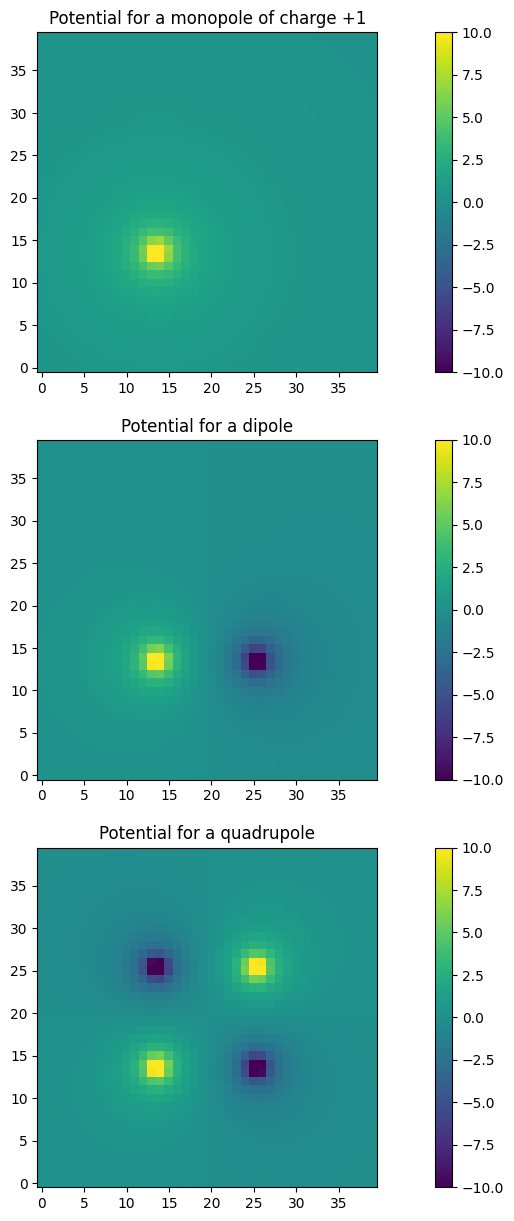

In [12]:
# Define variables for charge(s) and positions

# Charge 1
q1 = 1     # Atomic charge = 1.6...x10^(-19)C
x1 = -0.6   
y1 = -0.6
# Charge 2
q2 = -1    # Atomic charge = 1.6...x10^(-19)C
x2 = 0.6
y2 = -0.6
# Charge 3
q3 = 1    # Atomic charge = 1.6...x10^(-19)C
x3 = 0.6
y3 = 0.6
# Charge 4
q4 = -1    # Atomic charge = 1.6...x10^(-19)C
x4 = -0.6
y4 = 0.6


# Create grid of x and y positions for plotting
x = np.linspace(-2, 2, 40)
y = np.linspace(-2, 2, 40)

x2D, y2D = np.meshgrid(x, y)

pot1 = potential(q1,x1,y1,x2D,y2D)

# Creating the figure to add the graphs of the potentials to
fig = plt.figure(figsize = (15, 15))

# Graph 1 - Monopole
ax1 = fig.add_subplot(3, 1, 1)
im1 = ax1.imshow(pot1, origin = "lower", vmin = -10, vmax = 10)
ax1.set_title("Potential for a monopole of charge +1")
plt.colorbar(im1)

# Adding the extra charge for dipole and using that potentials sum
pot2 = pot1 + potential(q2, x2, y2, x2D, y2D)

#Graph 2 - Dipole
ax2 = fig.add_subplot(3, 1, 2)
im2 = ax2.imshow(pot2, origin = "lower", vmin = -10, vmax = 10)
ax2.set_title("Potential for a dipole")
plt.colorbar(im2)

# Adding the extra 2 charges for quadrupole and using that potentials sum
pot4 = pot2 + potential(q3, x3, y3, x2D, y2D) + potential(q4, x4, y4, x2D, y2D)

#Graph 3 - Quadrapole
ax3 = fig.add_subplot(3, 1, 3)
im3 = ax3.imshow(pot4, origin = "lower", vmin = -10, vmax = 10)
ax3.set_title("Potential for a quadrupole")
plt.colorbar(im3)

### Electric fields
Now we look at the electric fields and their plots of the 3 different cases.

In [7]:
def field(charge,x0,y0,x,y):
    """
    Calculates the electric field in x and y directions for a single charge
    Inputs:
    charge  Value of charge
    x0, y0  Location of charge (floats)
    x, y    Positions for potential to be evaluated
    Returns: E_x, E_y  The electric fields in x and y direction
    """
    r = np.sqrt((x - x0) ** 2 + (y - y0) ** 2)
    
    E_x = charge * (x - x0)/(r**3)
    E_y = charge * (y - y0)/(r**3)
    
    return E_x, E_y

Text(0.5, 1.0, 'Field for a quadrupole')

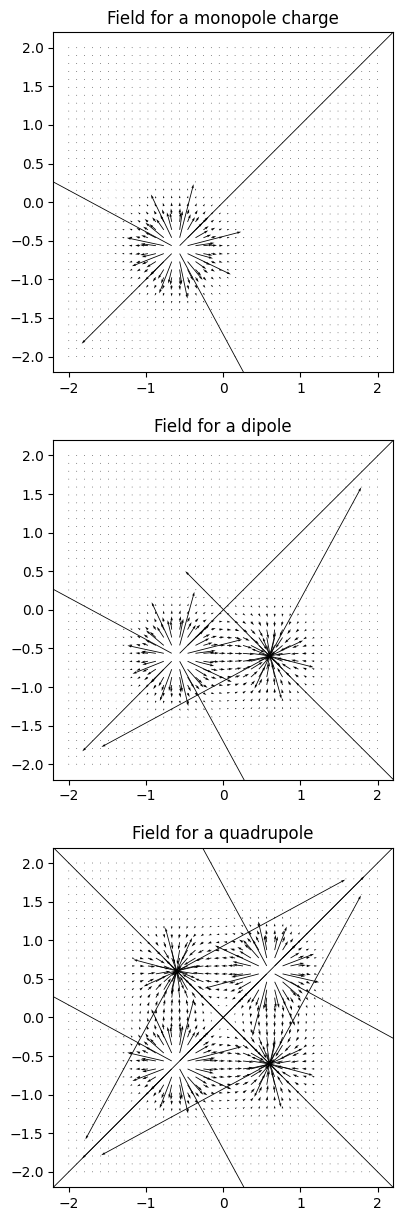

In [8]:
# Calculate x and y components of field for one charge
Ex1, Ey1 = field(q1,x1,y1,x2D,y2D)

#Creating the firgure for the grpahs to fit
fig2 = plt.figure(figsize = (15, 15))
ax1 = fig2.add_subplot(3, 1, 1)
ax1.set_box_aspect(1)
ax2 = fig2.add_subplot(3, 1, 2)
ax2.set_box_aspect(1)
ax3 = fig2.add_subplot(3, 1, 3)
ax3.set_box_aspect(1)

# Plot of monopole
ax1.quiver(x2D, y2D, Ex1, Ey1, scale = 300)
ax1.set_title("Field for a monopole charge")

# Add second charge
Ex2, Ey2 = field(q2, x2, y2, x2D, y2D)
Ex2 += Ex1
Ey2 += Ey1

# Plot dipole
ax2.quiver(x2D, y2D, Ex2, Ey2, scale = 300)
ax2.set_title("Field for a dipole")

# Add third and fourth charge
Ex3, Ey3 = field(q3, x3, y3, x2D, y2D)
Ex3 += Ex2
Ey3 += Ey2
Ex4, Ey4 = field(q4, x4, y4, x2D, y2D)
Ex4 += Ex3
Ey4 += Ey3

# Plot the quadropole

ax3.quiver(x2D, y2D, Ex4, Ey4, scale = 300)
ax3.set_title("Field for a quadrupole")

### Conclusions
During this exercise I have learned that while decreasing the gap between points in the x and y 1D arrays improves the resolution of the electric potential diagrams, it also makes the electric field vector plot less readable as there are more arrows. 

By decreasing the gap between points I also found that you get arrows that are very long as the distance between the charge and closest point is very small to $r$ is very small and length $\propto \frac{1}{r}$ which makes the graph less legible. 